SGD с Mini-batch

1. Создание синтетического датасета из 100 точек, соответствующего линейной модели:
![alt text](image-2.png)

Истинные значения параметров: w=3, b=1

In [10]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n = 100
x = np.random.uniform(-5, 5, n)
eps = np.random.normal(0, 2, n)  
y = 3 * x + 1 + eps

def compute_loss(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    return 0.5 * np.mean(errors**2)

2. Обучение с помощью SGD (batch size = 1): на каждой итерации берётся одна случайная точка, вычисляется локальный градиент. Из-за использования одного примера за шаг наблюдается высокая вариативность градиентов. 

In [11]:
def sgd(x, y, lr=0.02, epochs=1000):
    w, b = 10.0, 10.0
    losses = []
    ws, bs = [], []
    n_samples = len(x)
    
    for epoch in range(epochs):
        idx = np.random.permutation(n_samples)
        x_shuffled, y_shuffled = x[idx], y[idx]
        
        for i in range(n_samples):
            xi, yi = x_shuffled[i], y_shuffled[i]
            pred = w * xi + b
            error = pred - yi
            
            w -= lr * error * xi
            b -= lr * error
            
            ws.append(w)
            bs.append(b)
            losses.append(0.5 * error**2)
    
    return w, b, compute_loss(x, y, w, b), ws, bs, losses

3. Mini-batch SGD (batch size = 10): данные разбиваются на батчи по 10 примеров. На каждом шаге вычисляется усреднённый градиент по батчу. Более стабильные градиенты обеспечивают плавную сходимость.

In [12]:
def minibatch_sgd(x, y, batch_size=10, lr=0.02, epochs=1000):
    w, b = 10.0, 10.0
    losses = []
    ws, bs = [], []
    n_samples = len(x)
    
    for epoch in range(epochs):
        idx = np.random.permutation(n_samples)
        x_shuffled, y_shuffled = x[idx], y[idx]
        
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            xb = x_shuffled[start:end]
            yb = y_shuffled[start:end]
            
            pred = w * xb + b
            errors = pred - yb
            
            dw = np.mean(errors * xb)
            db = np.mean(errors)
            
            w -= lr * dw
            b -= lr * db
            
            ws.append(w)
            bs.append(b)
            losses.append(0.5 * np.mean(errors**2))
    
    return w, b, compute_loss(x, y, w, b), ws, bs, losses


w_sgd, b_sgd, loss_sgd, ws_sgd, bs_sgd, losses_sgd = sgd(x, y, lr=0.02, epochs=1000)
w_mbsgd, b_mbsgd, loss_mbsgd, ws_mbsgd, bs_mbsgd, losses_mbsgd = minibatch_sgd(x, y, batch_size=10, lr=0.02, epochs=1000)

print(f"SGD - Финальные параметры: w = {w_sgd:.4f}, b = {b_sgd:.4f}")
print(f"SGD - Финальный loss: {loss_sgd:.6f}")

print()

print(f"Mini-batch SGD - Финальные параметры: w = {w_mbsgd:.4f}, b = {b_mbsgd:.4f}")
print(f"Mini-batch SGD - Финальный loss: {loss_mbsgd:.6f}")

SGD - Финальные параметры: w = 2.9044, b = 1.0260
SGD - Финальный loss: 1.614830

Mini-batch SGD - Финальные параметры: w = 2.9345, b = 0.9673
Mini-batch SGD - Финальный loss: 1.616288


Полученные значения параметров почти одинаковы. Это говорит о том, что оба метода достигают близкой точки минимума, то есть оба эффективно сходятся.

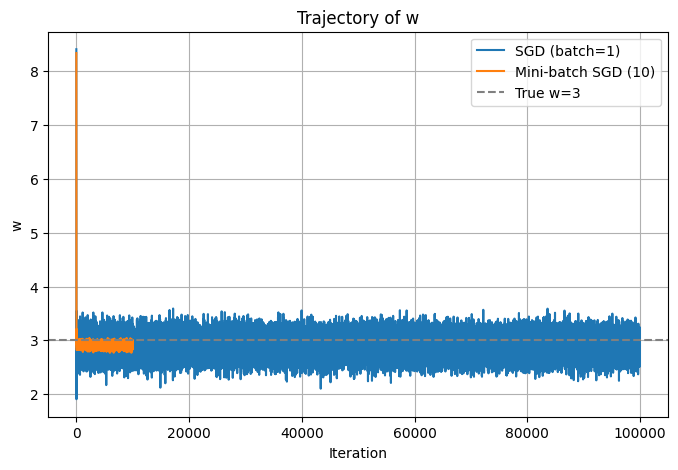

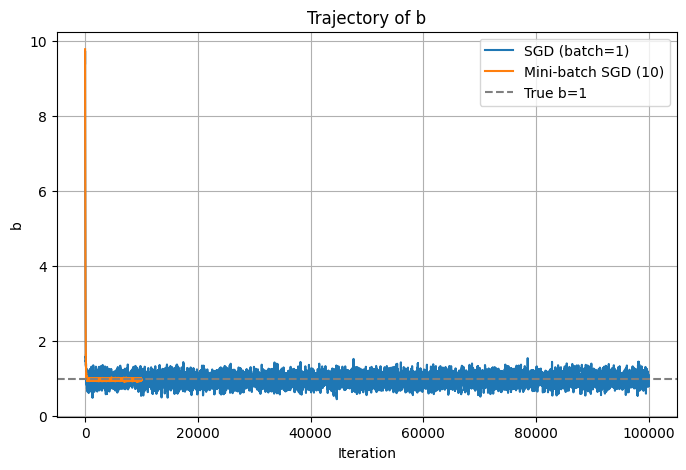

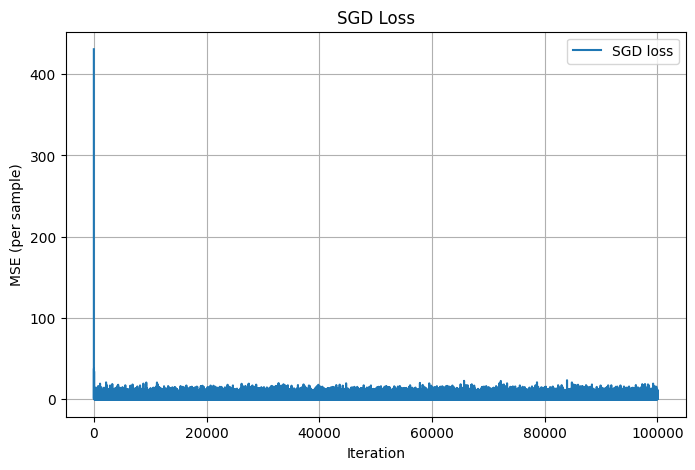

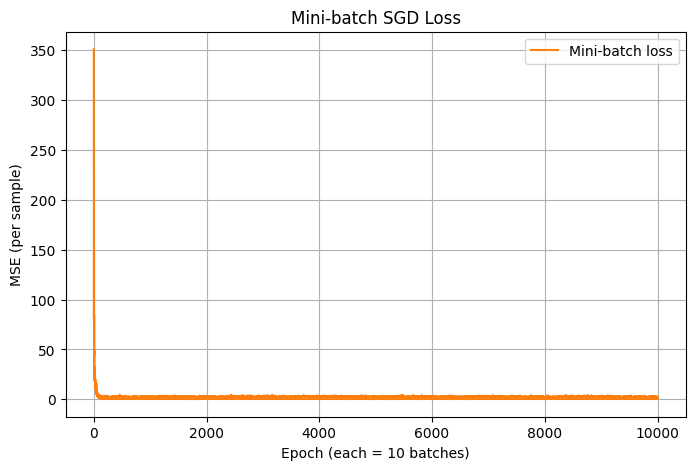

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(ws_sgd, label='SGD (batch=1)', color='tab:blue')
plt.plot(ws_mbsgd, label='Mini-batch SGD (10)', color='tab:orange')
plt.axhline(y=3, color='gray', linestyle='--', label='True w=3')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.title('Trajectory of w')
plt.legend()
plt.grid(True)
plt.show()

# 2. График траектории b
plt.figure(figsize=(8, 5))
plt.plot(bs_sgd, label='SGD (batch=1)', color='tab:blue')
plt.plot(bs_mbsgd, label='Mini-batch SGD (10)', color='tab:orange')
plt.axhline(y=1, color='gray', linestyle='--', label='True b=1')
plt.xlabel('Iteration')
plt.ylabel('b')
plt.title('Trajectory of b')
plt.legend()
plt.grid(True)
plt.show()

# 3. График loss для SGD
plt.figure(figsize=(8, 5))
plt.plot(losses_sgd, label='SGD loss', color='tab:blue')
plt.xlabel('Iteration')
plt.ylabel('MSE (per sample)')
plt.title('SGD Loss')
plt.legend()
plt.grid(True)
plt.show()

# 4. График loss для Mini-batch SGD
plt.figure(figsize=(8, 5))
plt.plot(losses_mbsgd, label='Mini-batch loss', color='tab:orange')
plt.xlabel('Epoch (each = 10 batches)')
plt.ylabel('MSE (per sample)')
plt.title('Mini-batch SGD Loss')
plt.legend()
plt.grid(True)
plt.show()

График 1: траектория w <br>
Оба метода начинаются примерно с w0=10 (высокий старт).
SGD (синий график): резкий спад уже за первые 1 000 итераций — до 3.2, затем колеблется.
Mini-batch (оранжевый график): также быстро падает, но более плавно — к 5 000 итерациям достигает 2.93 и почти стабилизируется.

Mini-batch SGD стабилизируется уже к 10 000 итерациям (т.е. после 100 эпох).
SGD требует >50 000 итераций для достижения аналогичной стабильности. Mini-batch ускоряет сходимость по числу итераций, особенно при умеренных размерах батча.

График 2: траектория b<br>
Оба метода начинаются примерно с b0=10 (высокий старт).
SGD (синий график): падает до 1.2 за 2 000 итераций, затем колеблется.
Mini-batch (оранжевый график): также быстро снижается, но уже к 1 500 итерациям достигает 1.0–1.1 и стабилизируется чуть раньше.

Mini-batch SGD обеспечивает более надёжную и быструю сходимость, чем SGD.

График 3: SGD потери<br>
Высокий начальный loss вполне ожидаем, так как начальные значения параметров сильно отличаются от целевых. Резкие скачки характерны для SGD с batch=1: каждый шаг — это loss на одном примере, включая выбросы. Стабилизация колебаний значений около 1.6
Показывает, что обучение успешно: модель адаптировалась к данным, и остаточная ошибка близка к уровню шума (примерно 2).

График 4: Mini-batch SGD потери<br>
Mini-batch SGD сходится в несколько раз быстрее по числу итераций, с меньшей дисперсией, и достигает того же качества модели. 
